# Question 1
**The first question** that I pose on the cereal is to see the ratings and the nutritional distribution to get a glance of the overall data distribution.
How does the different nutrition contents of the eighty types of breakfast cereals distributed?

### Step 1. Importing database and reading the dataframe.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_csv("cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [144]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


array([[<AxesSubplot:title={'center':'protein'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'fat'}>],
       [<AxesSubplot:title={'center':'sodium'}>,
        <AxesSubplot:title={'center':'fiber'}>,
        <AxesSubplot:title={'center':'carbo'}>],
       [<AxesSubplot:title={'center':'sugars'}>,
        <AxesSubplot:title={'center':'potass'}>,
        <AxesSubplot:title={'center':'vitamins'}>]], dtype=object)

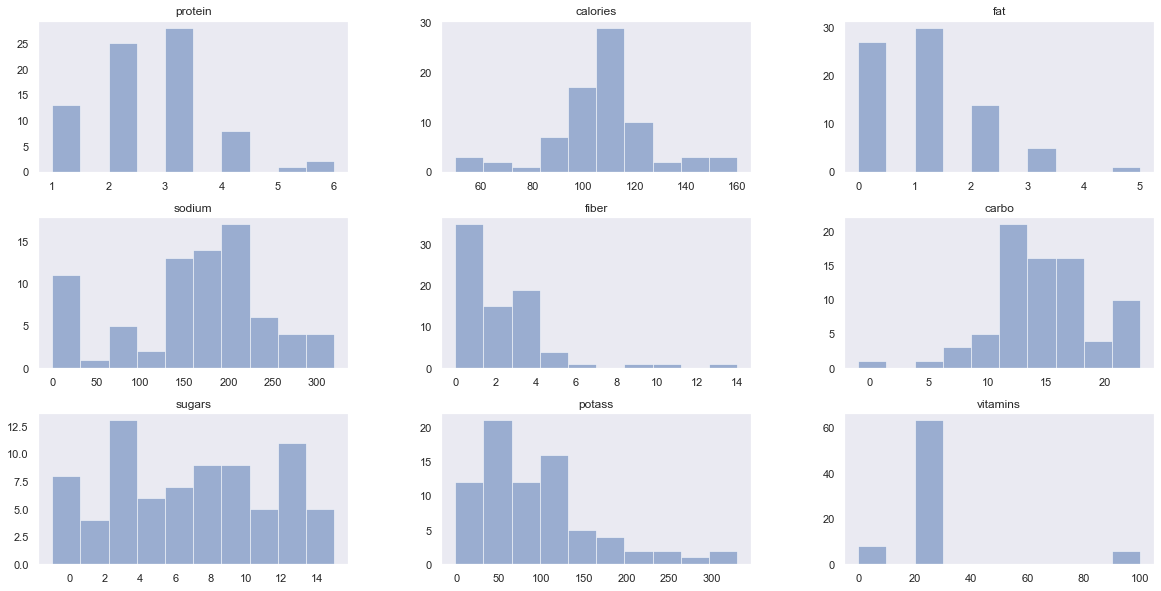

In [145]:
sns.set(font_scale = 1)
df[['protein','calories','fat','sodium','fiber','carbo','sugars','potass','vitamins']].hist(grid=False, alpha=0.5,figsize=(20,10))


/Users/huishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/huishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/huishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

[Text(0, 0.5, '')]

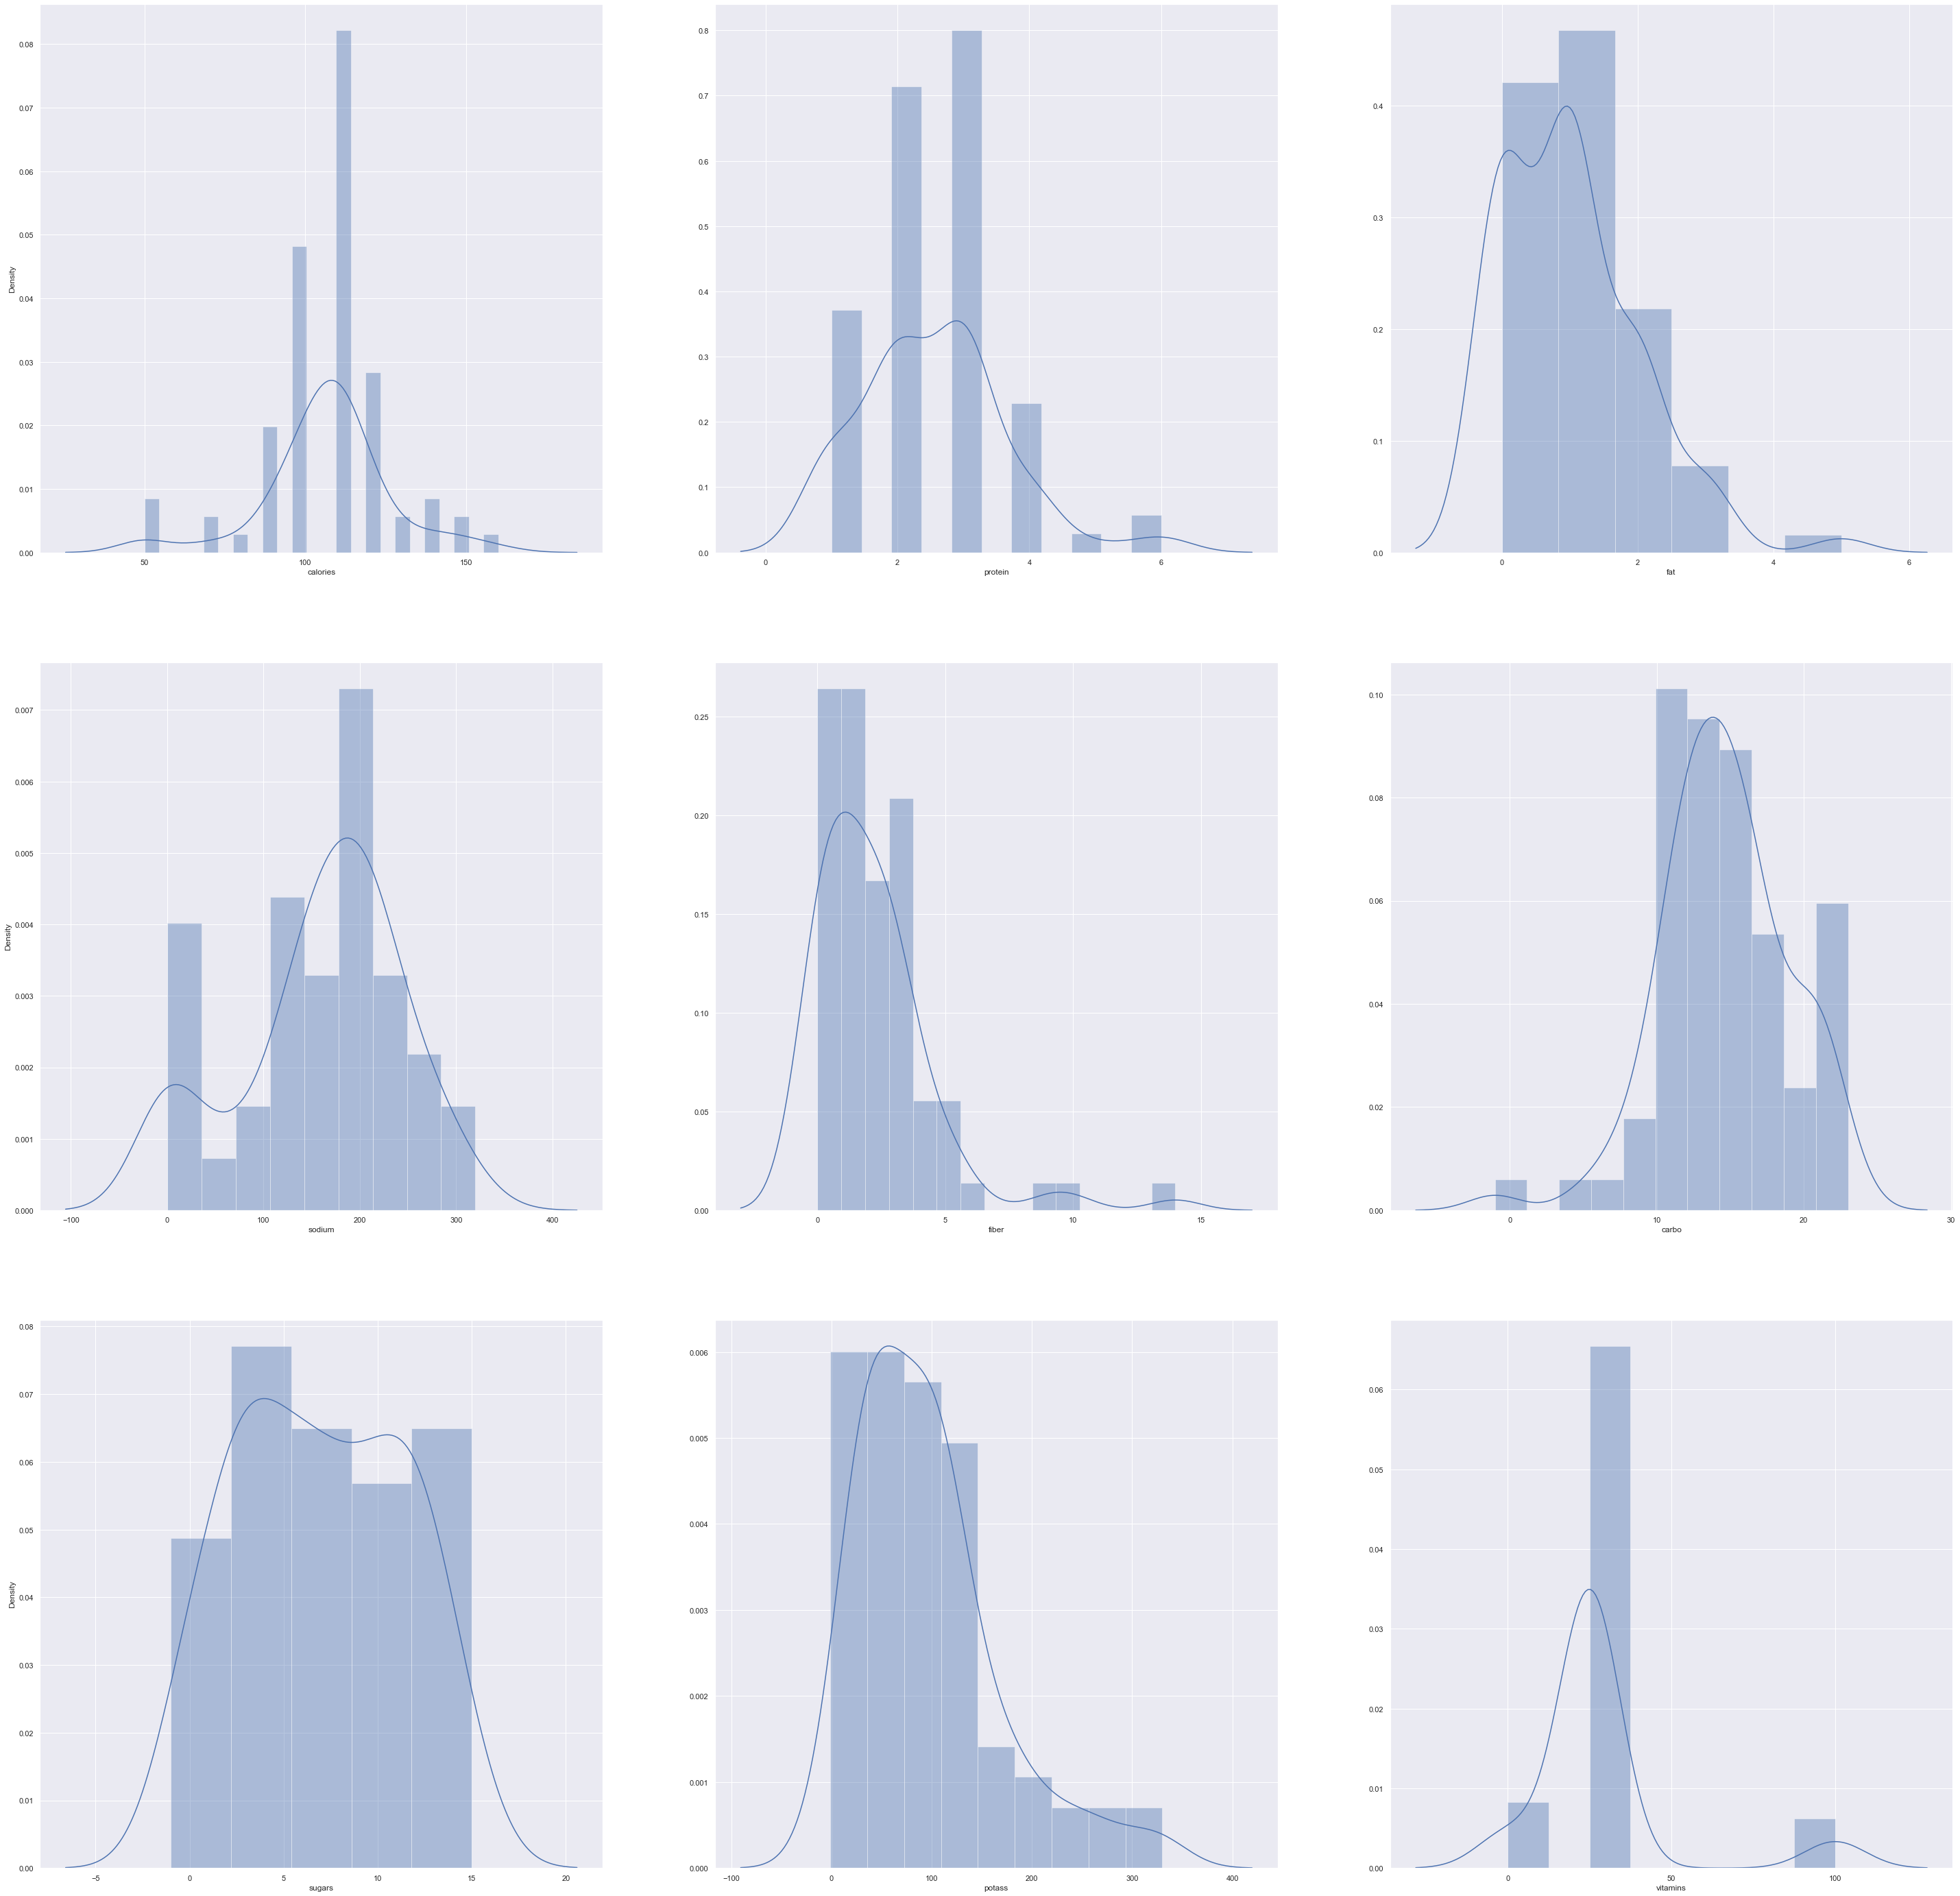

In [146]:
# Display the histogram to understand the data
f, axes = plt.subplots(3,3, figsize=(50,50))
sns.set(font_scale = 4)
sns.distplot( df["calories"], ax=axes[0,0])
sns.distplot( df["protein"], ax=axes[0,1]).set(ylabel=None)
sns.distplot( df["fat"], ax=axes[0,2]).set(ylabel=None)
sns.distplot( df["sodium"], ax=axes[1,0])
sns.distplot( df["fiber"], ax=axes[1,1]).set(ylabel=None)
sns.distplot( df["carbo"], ax=axes[1,2]).set(ylabel=None)
sns.distplot( df["sugars"], ax=axes[2,0])
sns.distplot( df["potass"], ax=axes[2,1]).set(ylabel=None)
sns.distplot( df["vitamins"], ax=axes[2,2]).set(ylabel=None)

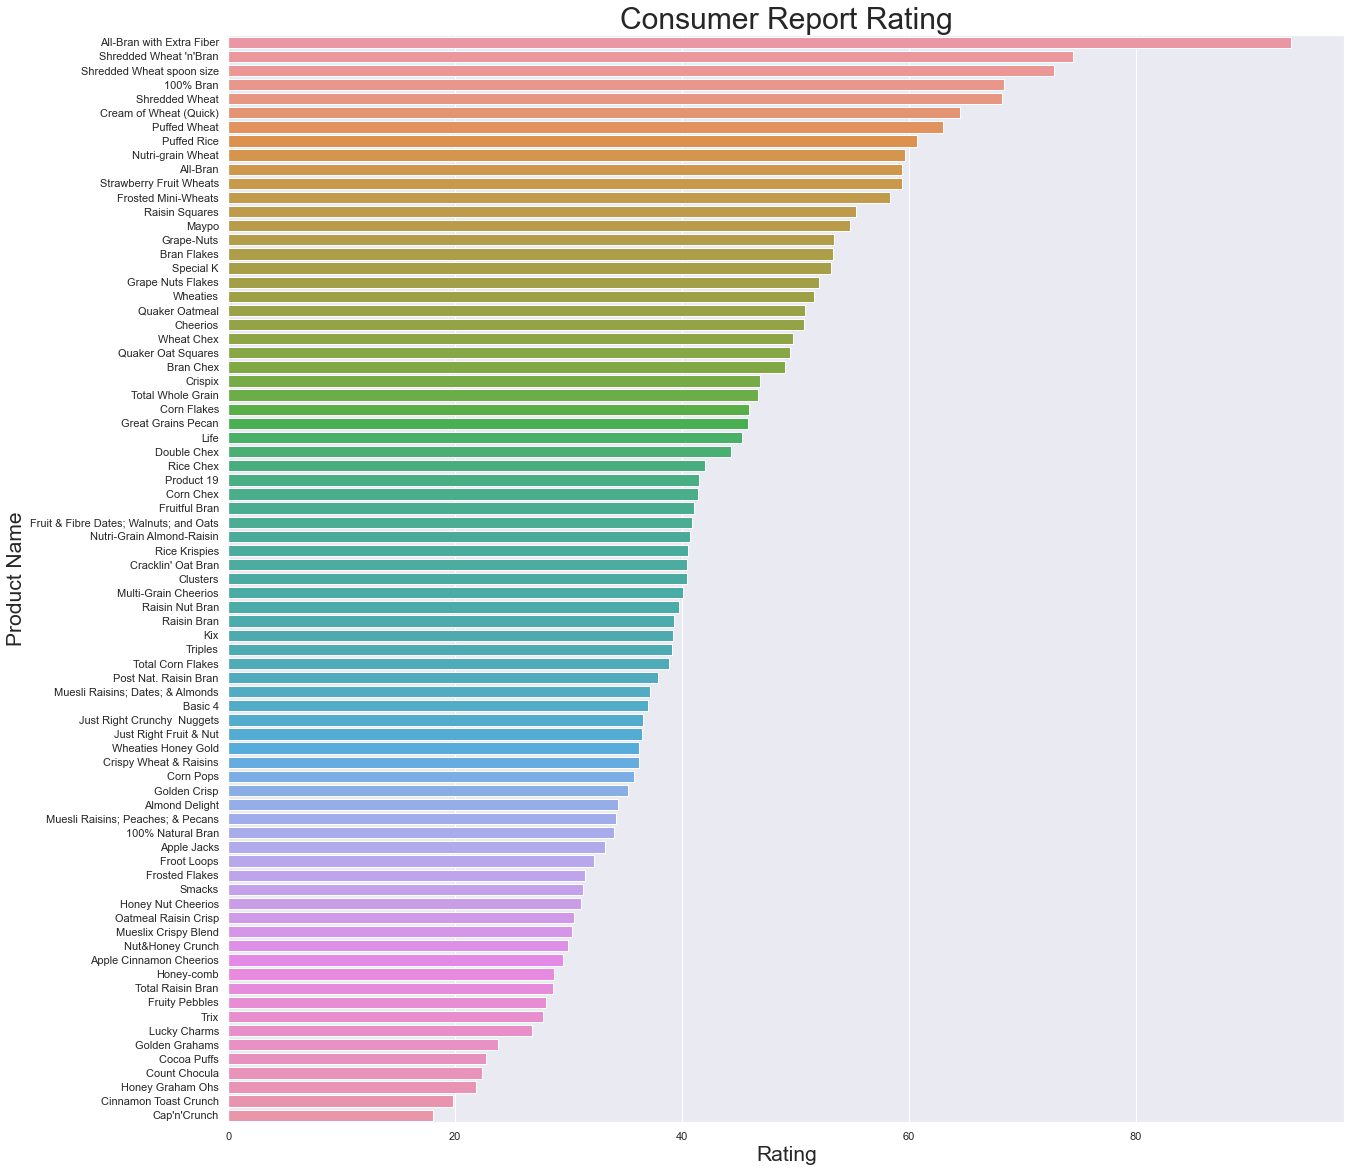

In [147]:
# Visualization product ranking
df = df.sort_values(['rating'],ascending=False).reset_index(drop=True)
sns.set(font_scale = 1)
plt.figure(figsize=(20,20))
sns.barplot(x=df["rating"],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("Rating",fontsize=21)
plt.title("Consumer Report Rating",fontsize=30)
plt.show()


All-Bran with Extra Fiber,Shredded Wheat 'n'Bran,Shredded Wheat spoon size,100% Bran,Shredded Wheat

In [148]:
string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)

All-Bran with Extra Fiber, Shredded Wheat 'n'Bran, Shredded Wheat spoon size, 100% Bran, Shredded Wheat
Cocoa Puffs, Count Chocula, Honey Graham Ohs, Cinnamon Toast Crunch, Cap'n'Crunch


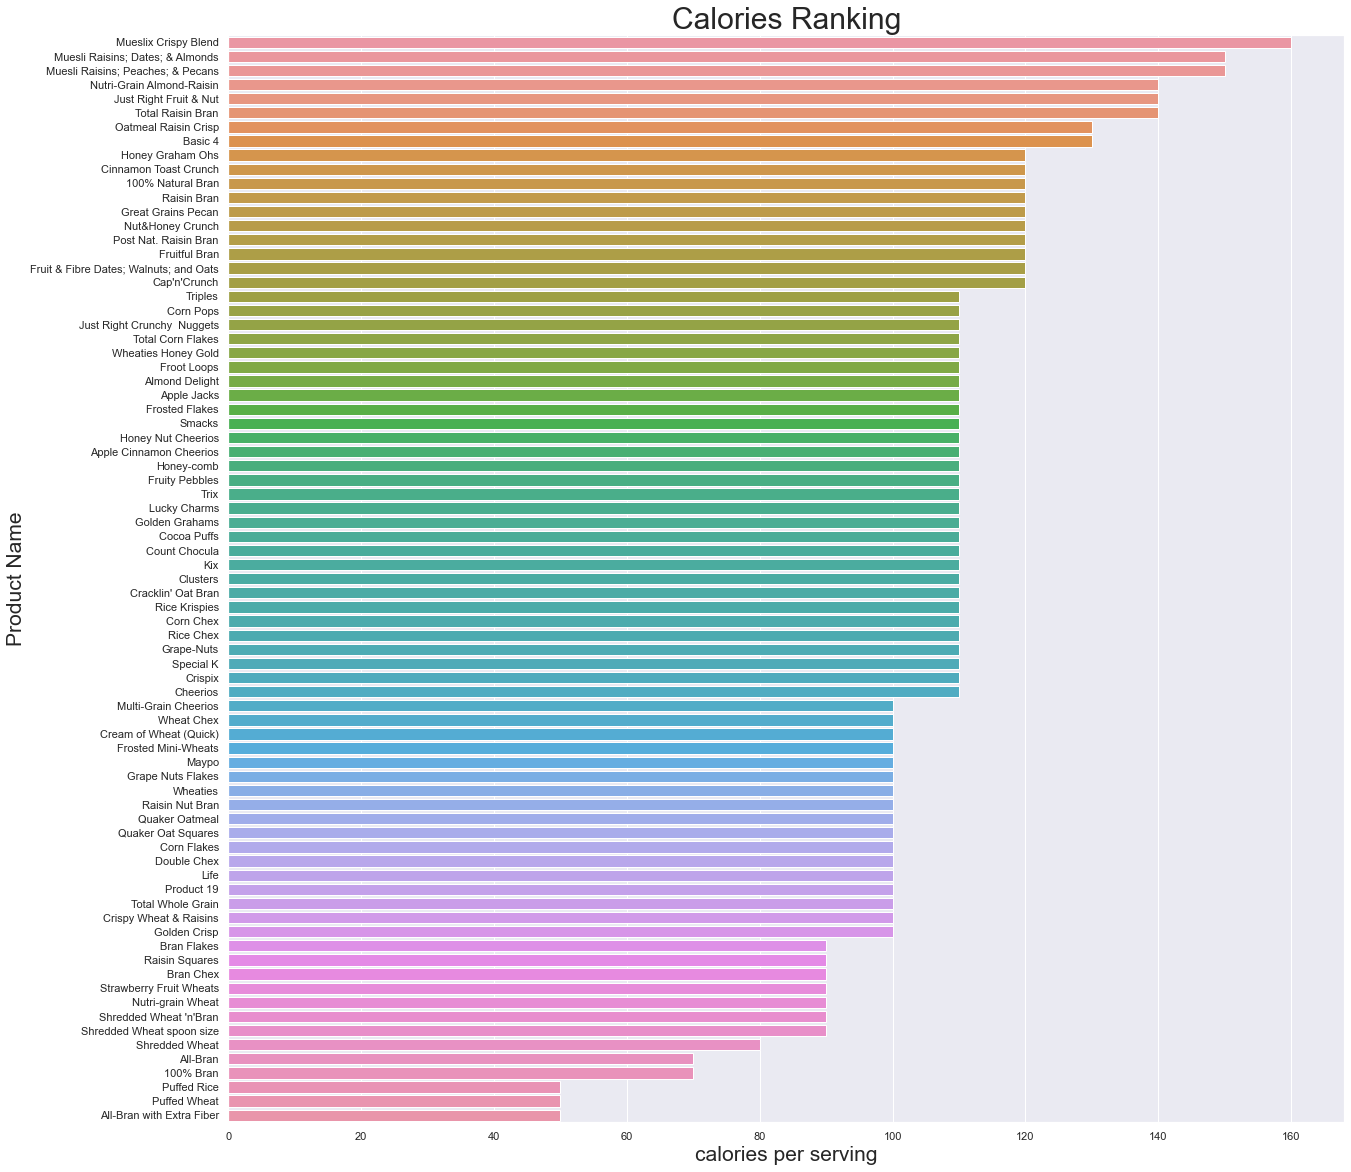

In [149]:
# Visualization calories
df = df.sort_values(['calories'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df['calories'],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("calories per serving",fontsize=21)
plt.title("Calories Ranking",fontsize=30)
plt.show()

In [150]:
string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)

Mueslix Crispy Blend, Muesli Raisins; Dates; & Almonds, Muesli Raisins; Peaches; & Pecans, Nutri-Grain Almond-Raisin, Just Right Fruit & Nut
All-Bran, 100% Bran, Puffed Rice, Puffed Wheat, All-Bran with Extra Fiber


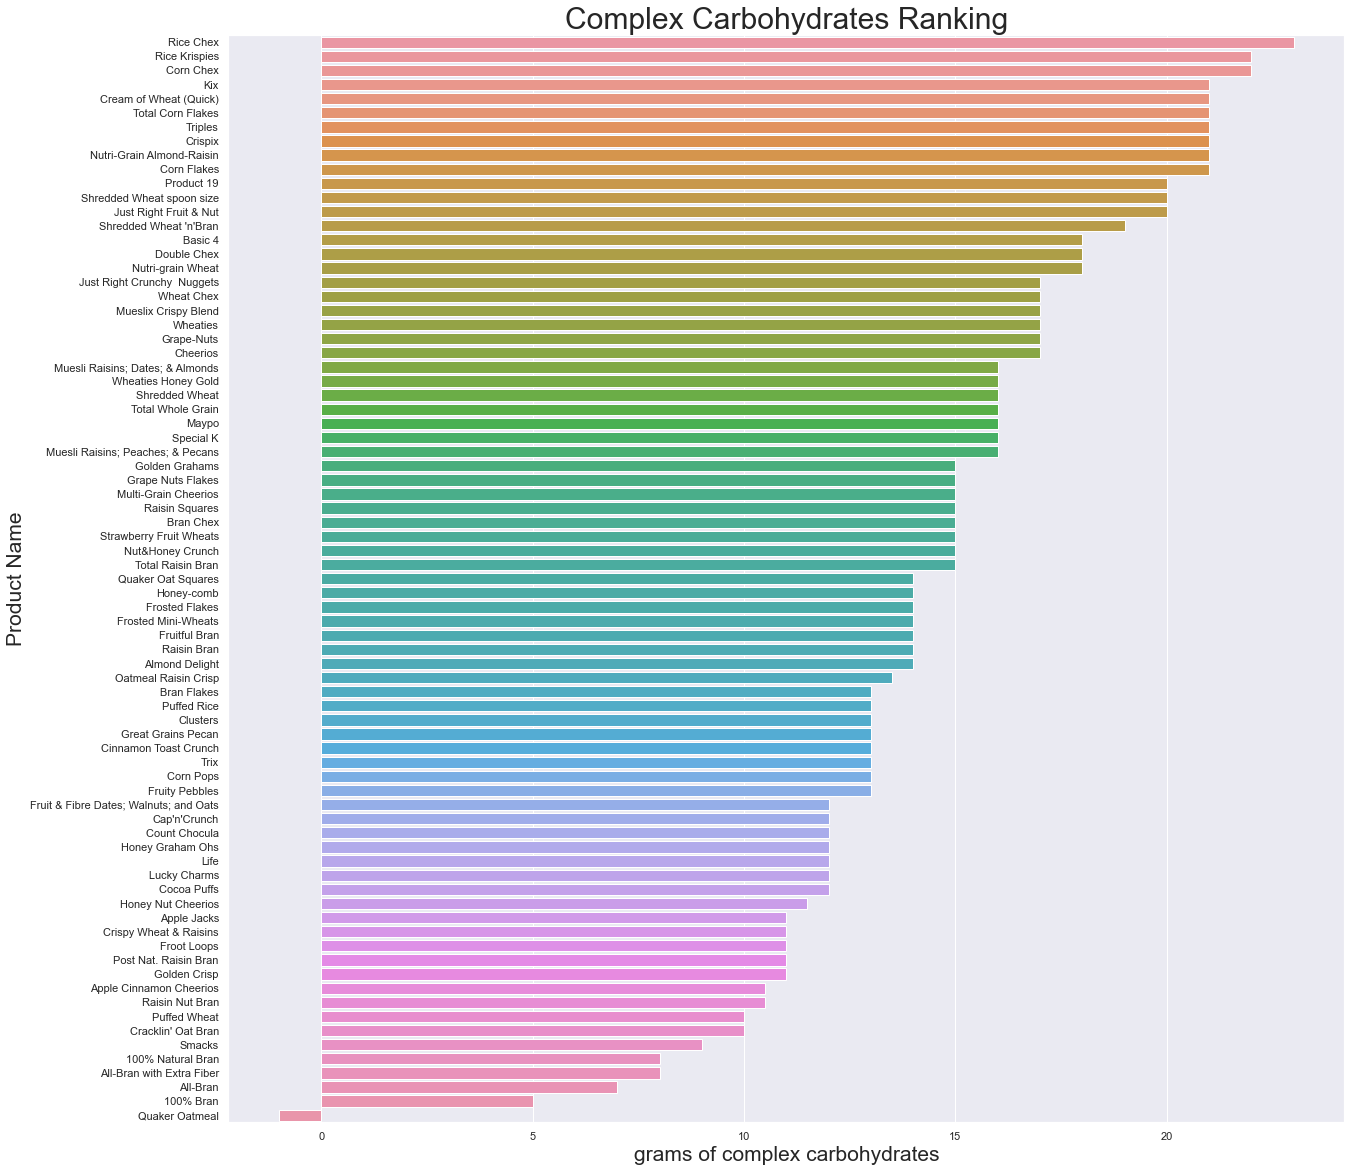

Rice Chex, Rice Krispies, Corn Chex, Kix, Cream of Wheat (Quick)
100% Natural Bran, All-Bran with Extra Fiber, All-Bran, 100% Bran, Quaker Oatmeal


In [151]:
# Visualization carbo
df = df.sort_values(['carbo'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["carbo"],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("grams of complex carbohydrates",fontsize=21)
plt.title("Complex Carbohydrates Ranking",fontsize=30)
plt.show()

string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)

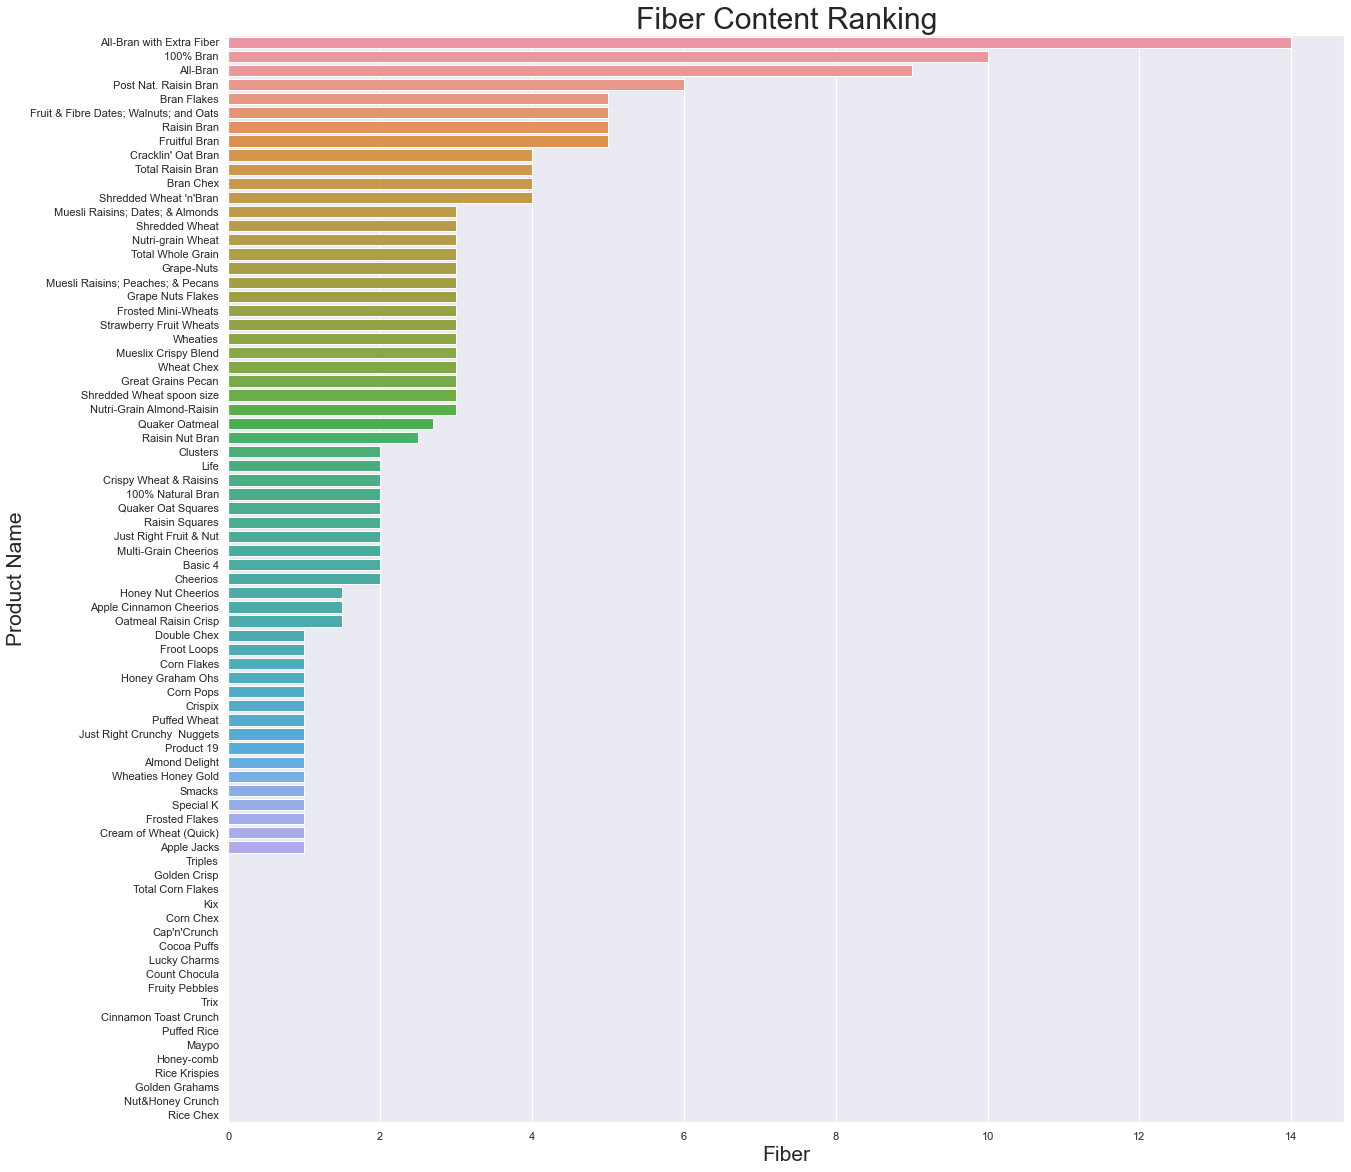

All-Bran with Extra Fiber, 100% Bran, All-Bran, Post Nat. Raisin Bran, Bran Flakes
Honey-comb, Rice Krispies, Golden Grahams, Nut&Honey Crunch, Rice Chex


In [152]:
# Visualization fiber
df = df.sort_values(['fiber'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["fiber"],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("Fiber",fontsize=21)
plt.title("Fiber Content Ranking",fontsize=30)
plt.show()

string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)

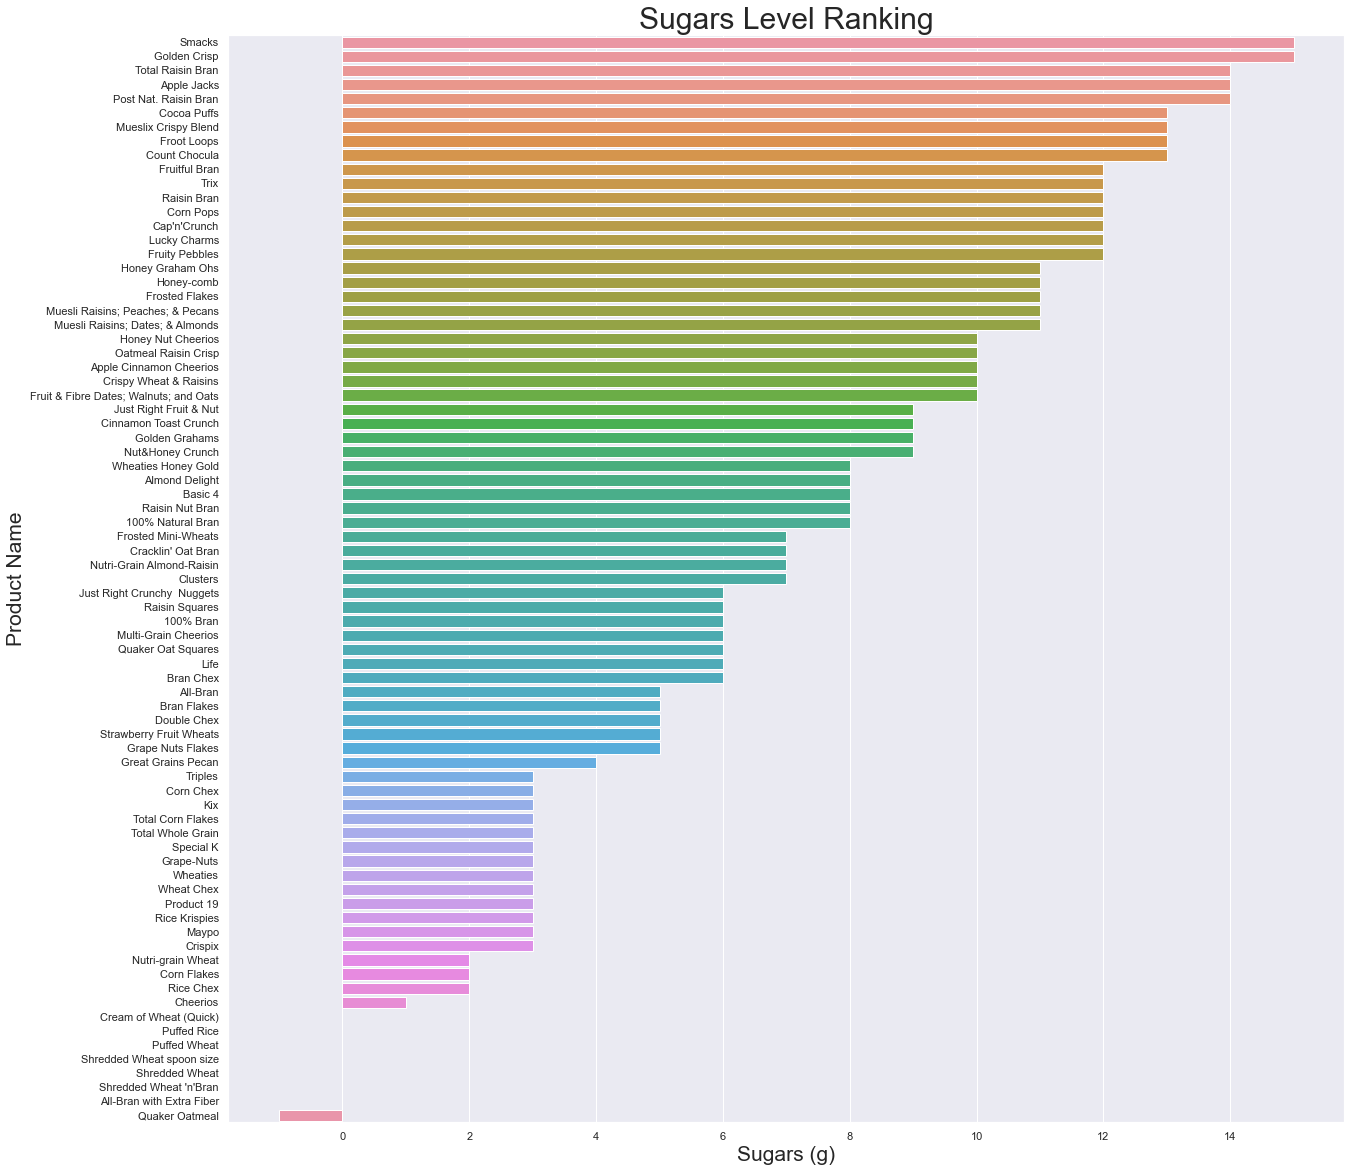

Smacks, Golden Crisp, Total Raisin Bran, Apple Jacks, Post Nat. Raisin Bran
Shredded Wheat spoon size, Shredded Wheat, Shredded Wheat 'n'Bran, All-Bran with Extra Fiber, Quaker Oatmeal


In [153]:
# Visualization fiber
df = df.sort_values(['sugars'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["sugars"],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("Sugars (g)",fontsize=21)
plt.title("Sugars Level Ranking",fontsize=30)
plt.show()

string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)

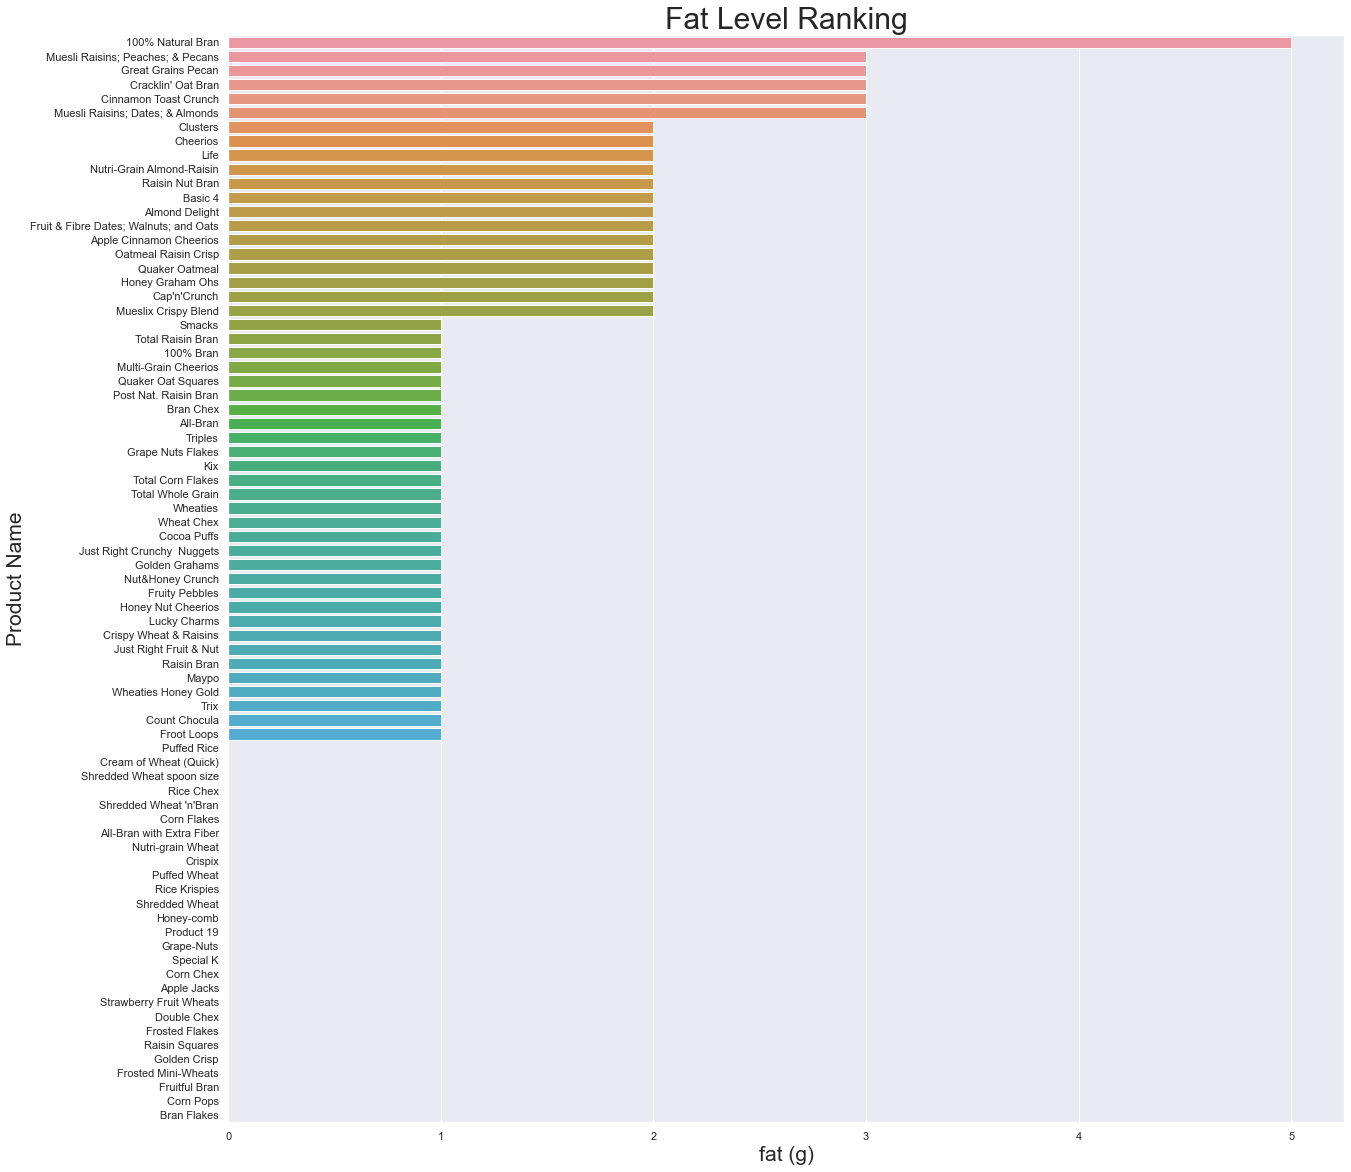

100% Natural Bran, Muesli Raisins; Peaches; & Pecans, Great Grains Pecan, Cracklin' Oat Bran, Cinnamon Toast Crunch
Golden Crisp, Frosted Mini-Wheats, Fruitful Bran, Corn Pops, Bran Flakes


In [154]:
# Visualization fat
df = df.sort_values(['fat'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["fat"],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("fat (g)",fontsize=21)
plt.title("Fat Level Ranking",fontsize=30)
plt.show()

string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)

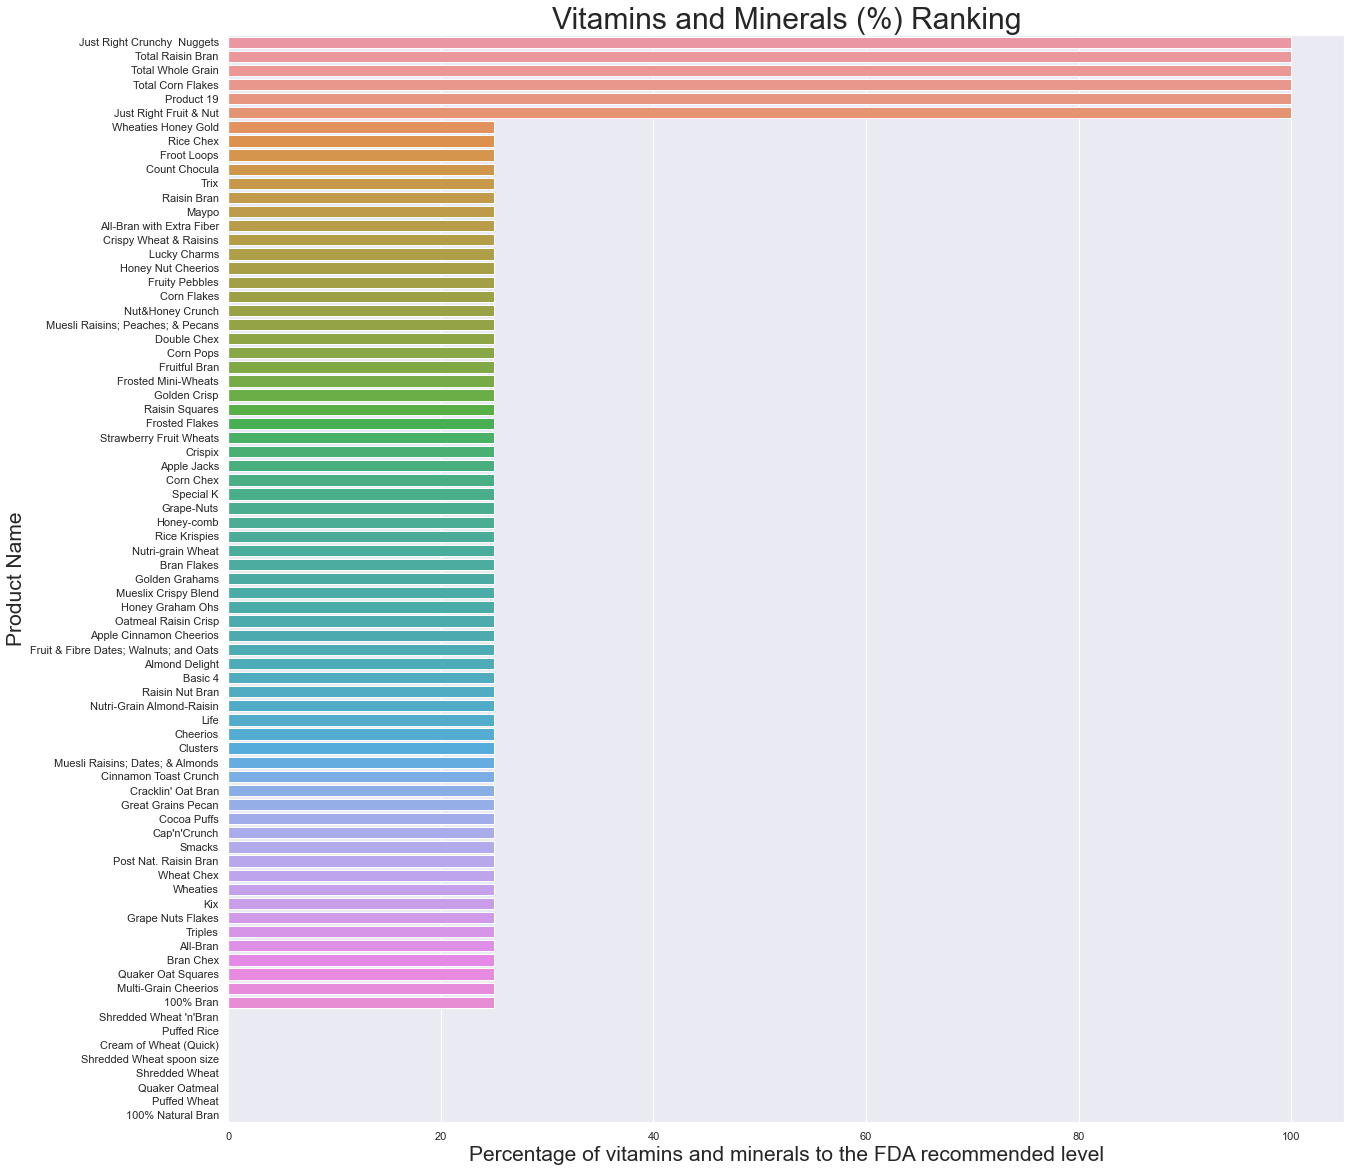

Just Right Crunchy  Nuggets, Total Raisin Bran, Total Whole Grain, Total Corn Flakes, Product 19
Shredded Wheat spoon size, Shredded Wheat, Quaker Oatmeal, Puffed Wheat, 100% Natural Bran


In [155]:
# Visualization vitamins
df = df.sort_values(['vitamins'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["vitamins"],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("Percentage of vitamins and minerals to the FDA recommended level",fontsize=21)
plt.title("Vitamins and Minerals (%) Ranking",fontsize=30)
plt.show()

string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)

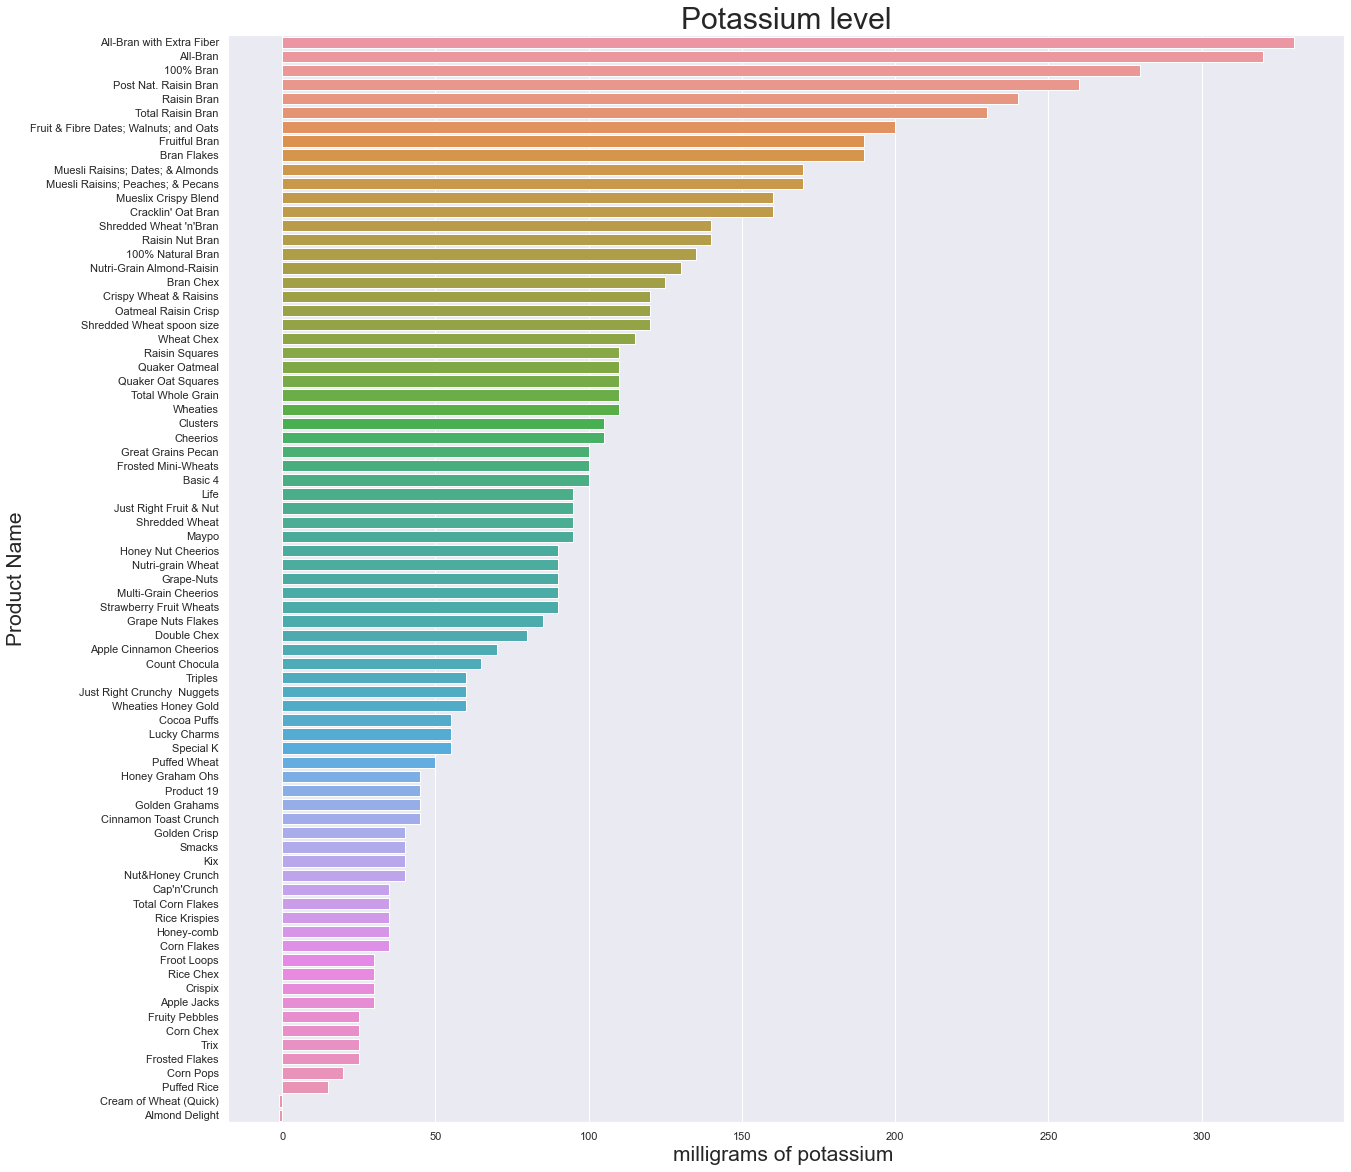

All-Bran with Extra Fiber, All-Bran, 100% Bran, Post Nat. Raisin Bran, Raisin Bran
Frosted Flakes, Corn Pops, Puffed Rice, Cream of Wheat (Quick), Almond Delight


In [156]:
# Visualization Potassium
df = df.sort_values(['potass'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["potass"],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("milligrams of potassium ",fontsize=21)
plt.title("Potassium level",fontsize=30)
plt.show()

string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)

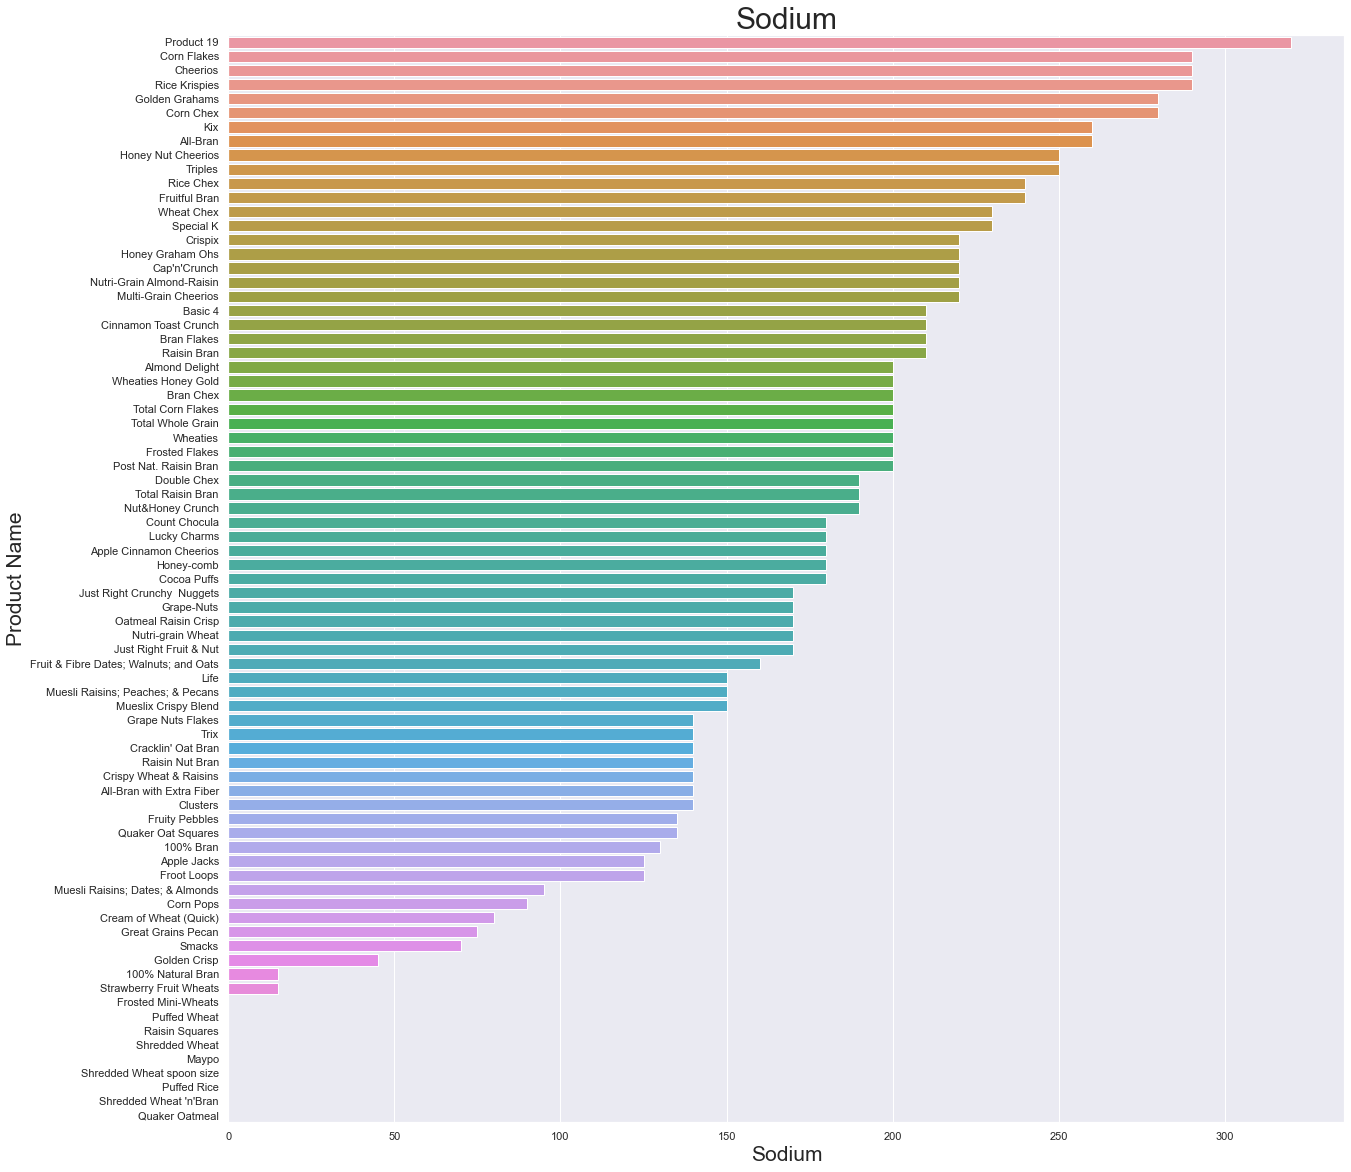

Product 19, Corn Flakes, Cheerios, Rice Krispies, Golden Grahams
Maypo, Shredded Wheat spoon size, Puffed Rice, Shredded Wheat 'n'Bran, Quaker Oatmeal


In [157]:
# Visualization Salt
df = df.sort_values(['sodium'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["sodium"],y=df["name"])
plt.ylabel("Product Name",fontsize=21)
plt.xlabel("Sodium",fontsize=21)
plt.title("Sodium",fontsize=30)
plt.show()

string = ", ".join(str(i) for i in list(df['name'].head()))
print(string)

string = ", ".join(str(i) for i in list(df['name'].tail()))
print(string)